# CS 168- Homework 1


### Load and rotate an image

In [1]:
import scipy
from scipy import misc
import matplotlib.pyplot as plt
import numpy as np
import imageio
from matplotlib import pyplot as plt
from time import time

#load in image as matrix
img=imageio.imread('./phantom.png')[:,:,0]

#Display raw image
plt.figure()
plt.imshow(img, cmap='gray')
plt.colorbar()
plt.title('Raw Phantom Image')
plt.xlabel('x')
plt.ylabel('y')

print('The shape of the phantom image is: {} '.format(np.shape(img)))

The shape of the phantom image is: (512, 512) 


 Rotate the image for 72 degrees ( not Radian ), and visualize the results. 
 
 Implement your work in the code cell below.

Text(0.5, 1.0, 'Phantom image rotated 72 deg CCW')

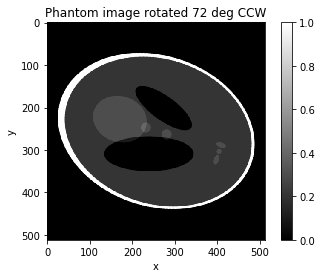

In [2]:
from skimage.transform import rotate

rot_angle = 72 #degrees to rotate image, CCW

rot_img = rotate(img,rot_angle) #CCW rotate and store in new variable

#Plot rotated image
f1 = plt.figure()
plt.imshow(rot_img,cmap='gray')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Phantom image rotated 72 deg CCW')


### Radon Transform and sonogram

The basic problem of tomography is given a set of 1-D projections and the angles at which the projections were taken how can we reconstruct a 2-D image.

We define the 1-D projection $g(\phi, s)$ at angle $\phi$ and is dinstance s from the origin. Then the radon transform is

$$g(t, \theta) = \int_{-\infty}^{+\infty}\int_{-\infty}^{+\infty}f(x, y)\delta(xcos\theta + ysin\theta -t)dxdy$$




Using scikit-image package, apply the radon transform and obtain a sonogram of the image. Visualize the results. 

Look at the documentation for radon transform function [here](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.radon). 

Implement your work in the following code block

(512,)


Text(0.5, 1.0, 'Sinogram of Phantom Image')

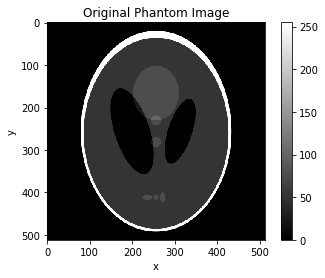

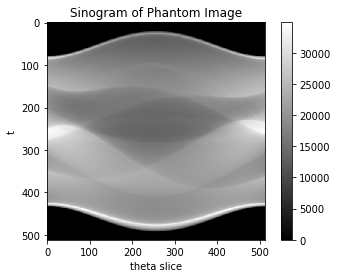

In [3]:
from skimage.transform import radon

theta = np.linspace(0.,180.,len(img)) #generate 512 angles evenly distributed between 0 and 180
sk_sinogram = radon(img,theta = theta,circle=True)

print(theta.shape)

#show original image
plt.figure()
plt.imshow(img,cmap='gray')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Original Phantom Image')

#Show Sinogram of original image
plt.figure()
plt.imshow(sk_sinogram,cmap='gray')
plt.colorbar()
plt.xlabel('theta slice')
plt.ylabel('t')
plt.title('Sinogram of Phantom Image')

Implement a sinogram function here from scratch. You are not allowed to use any external packages and can only take advantage of numpy. Visualize the results.

Implement your work in the following code block ( complete the function and plot the results ) 



Text(0.5, 1.0, 'Sinogram')

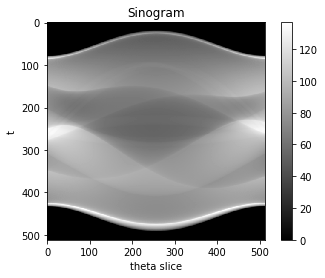

In [4]:
import skimage.transform as tform

def sinogram_radon(img):
    '''
    Rotate image around and produce a resulting sum from each angle.
    Return the combined sum of the full angle set as our sinogram
    '''
    sinogram = np.zeros((len(img),len(img)),dtype='float64')
    
    angles = 180.0/len(img) #slice size division (number of divisions to 180 deg that fit in the pixel space)
  
    for ii in range(0,len(img)):
        #each iteration represents one slice of angle

        rot = tform.rotate(img,-ii*angles).astype('float64')
        #rot = misc.imrotate(img,-ii*angles).astype('float64')
        sinogram[:,ii]=sum(rot)
    
    return sinogram



#run user function with default image and output sinogram
sinogram=sinogram_radon(img)

#Show produced sinogram
plt.figure()
plt.imshow(sinogram,cmap='gray')
plt.colorbar()
plt.xlabel('theta slice')
plt.ylabel('t')
plt.title('Sinogram')



### Backprojection and Inverse Radon Transform

Using scikit-image package, apply the inverse radon transform and obtain the reconstructed image from the  sonogram that was generated from your own implementation ( from scratch) . Visualize the results.

Look at the documentation for the inverse radon transform function [here](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.iradon). 

As an input to this function, use the sinogram generated by the package. 

Implement your work in the following code block.

Text(0, 0.5, 'y')

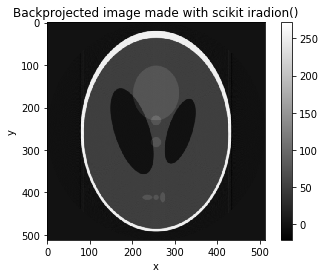

In [5]:
from skimage.transform import iradon

#create an array of angles from 0 to 180, enough to evenly fill the pixel space
theta = np.linspace(0., 180., len(img))

#perform inverse radon transform on 'sinogram',which was produced with scikit
backproject_image = iradon(sk_sinogram, theta=theta, circle=True)

#Show reconstructed image from inverse radon transform
plt.figure()
plt.imshow(backproject_image, cmap='gray')
plt.title('Backprojected image made with scikit iradion()')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')



Plot the reconstruction error and use the provided MSE function to calculate the mean squared error between the original and reconstructed image. 

filtered error is	19.28988131932477


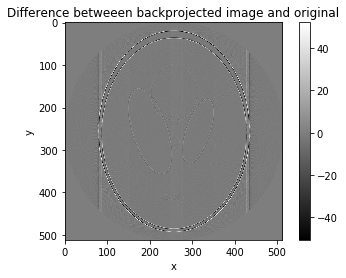

In [6]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err


#Difference between iradon image and original phantom image
error_AB = backproject_image - img

#display difference image
plt.figure()
plt.imshow(error_AB, cmap='gray')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Difference betweeen backprojected image and original')
plt.colorbar()

#display mean square error between backprojected image and original phantom image
filtered_error = mse(backproject_image,img)
print('filtered error is\t' + str(filtered_error))


Implement the backprojection algorithm from scratch. You are not allowed to use any packages and can only take advantage of numpy. Visualize the results.

As an input to this function, use the sinogram generated by the scikit-image radon function. 

Implement your work in the following code block ( complete the function and plot the results ). 

Now applying Angle: 0.0
Now applying Angle: 17.578125
Now applying Angle: 35.15625
Now applying Angle: 52.734375
Now applying Angle: 70.3125
Now applying Angle: 87.890625
Now applying Angle: 105.46875
Now applying Angle: 123.046875
Now applying Angle: 140.625
Now applying Angle: 158.203125
Now applying Angle: 175.78125


Text(0.5, 1.0, 'Reconstructed Image using meshgrid')

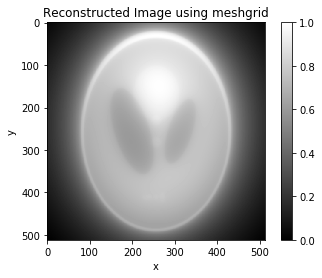

In [9]:
from scipy import interpolate


def manual_backprojection(projection):
    
    ims = []
    
    #number of pixels per side, assuming square image
    numpixels = len(projection)
    
    full_frame = np.zeros((numpixels,numpixels,numpixels))
    #set up the blank image to take projections
    reconstructed = np.zeros((numpixels,numpixels))

    #make small angle divisions, dtheta
    angles = 180.0/len(projection)
    rad2deg = 180.0/np.pi #convert radians to degrees



    #set up the mesh grid for our image size, translate back 256
    [x, y] = np.mgrid[0:numpixels, 0:numpixels] - 256
    yvals = np.arange(0,numpixels) - 256
    
    for num_angles in range(0,numpixels):
        
        
        #current theta angle based upon the theta increment of our image
        th = -num_angles * angles/rad2deg
        
        #tranformation,t 
        xform = y*np.cos(th) + x*np.sin(th)


        #applying new interpolated g(t,theta) to the reconstruction image
        reconstructed = reconstructed +  np.interp(xform, 
                                                   yvals, 
                                                   projection[:,num_angles])
        

        #Show progress of the processing, every 50 increments
        if (num_angles%50 == 0):
            print('Now applying Angle: ' + str(num_angles*angles))

        full_frame[:,:,num_angles] = reconstructed

    #normalize the outputs with min max over the whole image
    reconstructed = (reconstructed - np.min(reconstructed))/ \
        (np.max(reconstructed) - np.min(reconstructed))
    
    return reconstructed,full_frame

    
 
#Use the scikit produced sinogram and manually backproject to recreate the original phantom    
recon,stack = manual_backprojection(sk_sinogram)

#show the manually reconstructed backprojection without filtering
plt.figure()
plt.imshow(recon,cmap='gray')
plt.colorbar()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Reconstructed Image using meshgrid')


Plot the reconstruction error and use the provided MSE function to calculate the mean squared error between the original and reconstructed image. Compare your results with results generated by using iradon function in skimage.


In [ ]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

#remove the original image from our manually constructed projection
error_manual = recon - img

#plot the diff image
plt.figure()
plt.imshow(error_manual, cmap='gray')
plt.title('Difference betweeen unfiltered backprojected image and original phantom image')
plt.colorbar()

#display mean square error between backprojected image and original phantom image
manual_error = mse(recon, img)
print('Mean Square Error from Unfiltered backprojection is\t' + str(manual_error))
print('Mean Square Error from Filtered backprojection is\t' + str(filtered_error))




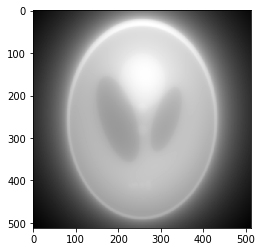

In [38]:
import matplotlib.animation as animation
import os

plt.close()
plt.rcParams["animation.html"] = "jshtml"

#plt.figure()
#plt.imshow(stack[:,:,300])
fig=plt.figure()
#plt.imshow(stack[:,:,255])
ims = []
dir_name = "/home/kgonzalez/IMAGES"
base_filename = "figure"
filename_suffix = ".png"
for ii in range(0,512):
        im = plt.imshow(stack[:,:,ii], animated=True)
        ims.append([im])
        plt.imshow(stack[:,:,ii],cmap='gray')
        name = os.path.join(dir_name, base_filename + str(ii).zfill(5)  + filename_suffix)
        
        plt.savefig(name) # save as png

ani = animation.ArtistAnimation(fig, ims, interval=1000, blit=True,
                                repeat_delay=500)
#plt.show()
#ani.save('dynamic_images.mp4')

In [ ]:
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def init():  # only required for blitting to give a clean slate.
    line.set_ydata([np.nan] * len(x))
    return line,


def animate(i):
    line.set_ydata(np.sin(x + i / 100))  # update the data.
    return line,


ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=2, blit=True, save_count=50)

# To save the animation, use e.g.
#
# ani.save("movie.mp4")
#
# or
#
# from matplotlib.animation import FFMpegWriter
# writer = FFMpegWriter(fps=15, metadata=dict(artist='Me'), bitrate=1800)
# ani.save("movie.mp4", writer=writer)

plt.show()